## imports

In [81]:
from mtcnn import MTCNN
import cv2
import os
import matplotlib.pyplot as plt
import time
import datetime


In [74]:
IMAGES_PATH = os.path.join('data','images', 'maskoff')

## Annotate com LabelMe

## MTCNN

In [75]:
def image_capture():
    """ Captura da imagem com Opencv """
    img = cv2.cvtColor(cv2.imread("./data/images/mask2.jpg"), cv2.COLOR_BGR2RGB)
    return detector_MTCNN(img)

In [76]:
def detector_MTCNN(img):
    """ Detecção da face com o método de  P-Net, R-Net, and O-Net - Cascaded Neural Networks """

    #detecta os rostos
    detector = MTCNN()
    faces = detector.detect_faces(img)
    return boxes_layer(img, faces)

2/2 [==============================] - 0s 56ms/step
{'left_eye': (522, 100), 'right_eye': (537, 99), 'nose': (530, 107), 'mouth_left': (525, 115), 'mouth_right': (536, 114)}
{'left_eye': (394, 68), 'right_eye': (408, 68), 'nose': (402, 76), 'mouth_left': (397, 81), 'mouth_right': (407, 81)}
{'left_eye': (132, 71), 'right_eye': (145, 70), 'nose': (139, 80), 'mouth_left': (134, 85), 'mouth_right': (145, 84)}
{'left_eye': (449, 121), 'right_eye': (462, 120), 'nose': (456, 128), 'mouth_left': (452, 136), 'mouth_right': (461, 135)}
{'left_eye': (48, 87), 'right_eye': (61, 87), 'nose': (54, 94), 'mouth_left': (50, 100), 'mouth_right': (60, 99)}
{'left_eye': (573, 77), 'right_eye': (587, 75), 'nose': (580, 83), 'mouth_left': (576, 91), 'mouth_right': (585, 90)}
{'left_eye': (214, 67), 'right_eye': (227, 67), 'nose': (220, 75), 'mouth_left': (216, 80), 'mouth_right': (226, 80)}
{'left_eye': (301, 72), 'right_eye': (314, 71), 'nose': (307, 77), 'mouth_left': (303, 84), 'mouth_right': (312, 84)}

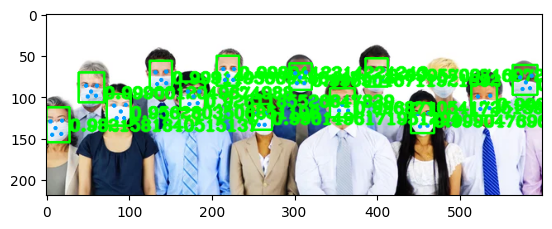

In [77]:
def boxes_layer(image, faces):
    """ mostrar na imagem a localização das faces """
    ax = plt.gca()

    #contagem
    count_faces = len(faces)

    for face in faces:
        #extraindo as coordenadas para o retângulo e keypoints e a prob.
        x, y, w, h = face['box']
        probs = face['confidence']
        kp = face['keypoints']

        #desenha o retângulo
        # rect = plt.Rectangle((x,y), width, height, color = 'green', fill = False)
        output_image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0), thickness=2)
        print(kp)

        #desenha keypoints
        cv2.circle(image,(kp['left_eye']), 1, (0,155,255), 2)
        cv2.circle(image,(kp['right_eye']), 1, (0,155,255), 2)
        cv2.circle(image,(kp['nose']), 1, (0,155,255), 2)
        cv2.circle(image,(kp['mouth_left']), 1, (0,155,255), 2)
        cv2.circle(image,(kp['mouth_right']), 1, (0,155,255), 2)

        #probabilidade
        # cv2.putText(image, str(
        #             probs), (x+w, y+w), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0), 2, cv2.LINE_AA)

    plt.imshow(image)
    plt.savefig('./data/result/contagem.jpg')
    plt.show()

image_capture()


In [83]:
def job():
    """ Função com o tempo para pausa e tempo de execução da capturas de pacotes """
    time_capture_sec = 5
    ini_exec = datetime.datetime.now()
    time_keep_capturing = datetime.datetime.now() + datetime.timedelta(seconds=10)
    pause_time_sec = 5
    file_number = 0
    while datetime.datetime.now() <= time_keep_capturing:
        try:
            file_number = file_number + 1
            capture_image_cam(time_capture_sec)
            time.sleep(pause_time_sec)
        except:
            break
        end_exec = datetime.datetime.now()

        execution_time = end_exec - ini_exec
        print(ini_exec, end_exec, time_keep_capturing, file_number)

In [85]:
def capture_image_cam(time):
    """ Captura imagem da webcam """
    key = cv2. waitKey(1)
    webcam = cv2.VideoCapture(0)
    while True:
        try:
            check, frame = webcam.read()
            print(check) #prints true  enquanto a cam está aberta
            print(frame) #prints matrix values of each framecd
            cv2.imshow("Capturing", frame)
            key = cv2.waitKey(1)
            if time == 5:
                cv2.imwrite(filename='./data/cam_images/captured_image.jpg', img=frame)
                webcam.release()
                cv2.waitKey(1650)
                cv2.destroyAllWindows()
                print("Resizing image to 416x416 scale...")
                img_ = cv2.resize(frame,(416,416))
                print("Resized...")
                img_resized = cv2.imwrite(filename='./data/cam_images/captured_image.jpg', img=img_)
                print("Image saved!")
                time==0

                break
            elif time==0:
                print("Turning off camera.")
                webcam.release()
                print("Camera off.")
                print("Program ended.")
                cv2.destroyAllWindows()
                break

        except(KeyboardInterrupt):
            print("Turning off camera.")
            webcam.release()
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break
job()

True
[[[189 193 192]
  [189 193 192]
  [189 193 192]
  ...
  [ 13  17  12]
  [ 12  16  11]
  [ 12  16  11]]

 [[189 193 192]
  [189 193 192]
  [189 193 192]
  ...
  [ 14  18  13]
  [ 14  18  13]
  [ 14  18  13]]

 [[189 193 192]
  [189 193 192]
  [189 193 192]
  ...
  [ 11  16  11]
  [ 12  17  12]
  [ 13  18  13]]

 ...

 [[  5  10   5]
  [  6  11   6]
  [  7  12   7]
  ...
  [233 233 220]
  [231 230 216]
  [226 225 211]]

 [[  5  10   5]
  [  6  11   6]
  [  7  12   7]
  ...
  [230 232 217]
  [230 231 215]
  [222 223 207]]

 [[  5  10   5]
  [  6  11   6]
  [  7  12   7]
  ...
  [226 229 214]
  [232 234 218]
  [227 228 212]]]
Resizing image to 416x416 scale...
Resized...
Image saved!
2022-11-13 02:18:31.999170 2022-11-13 02:18:40.152547 2022-11-13 02:19:31.999170 1
True
[[[187 191 190]
  [187 191 190]
  [187 191 190]
  ...
  [  7  12   7]
  [  7  12   7]
  [  7  12   7]]

 [[187 191 190]
  [187 191 190]
  [187 191 190]
  ...
  [  7  12   7]
  [  7  12   7]
  [  7  12   7]]

 [[187 191

## Parte II - Detectando os rostos com máscara e da classe "aluno"

### Preparando o ambiente

In [78]:
import tensorflow as tf
import numpy as np
import json
from matplotlib import pyplot as plt

In [79]:
tf.__version__

'2.10.0'

Limitando a memo da GPU

In [80]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

RuntimeError: Physical devices cannot be modified after being initialized

In [ ]:
tf.config.list_physical_devices('GPU')